In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

89.68280292300153 -26.967241696156975
-15.006156051828611 104.51369457643978
1.8452684935395354 168.1990331476752
82.70122954481997 138.74819161750565
-34.21709317929832 157.4116827882765
-82.17991629396944 161.97022779198153
-22.34544432419692 -104.33339900990357
85.34805043995163 69.04088829543633
87.78395985167987 83.12738830576882
-89.6802467044481 119.75906134831416
15.12309693648595 -11.302701696748102
-46.673278772936584 126.86713012908308
-28.511096675533928 -36.324378485238896
1.0801812524119043 177.74607583844153
-65.84325320116301 -106.59888921257955
-82.89615004030978 -29.23239695448737
10.185389917273469 124.2664719263048
-73.16805289744762 -104.83414008364035
83.83430442159539 -26.043532347379767
-4.226419774654829 -111.6222295556295
14.597378132140946 -73.6664379262407
43.61526395064428 160.33441050022333
48.95378617661436 -2.3032246757093446
11.029819414530095 18.31248123264271
-77.73789676086741 -147.03276002382913
9.415419102063098 -174.62973775730947
88.1925906055408

11.575529214471501 77.51014762190619
-38.237980918200066 123.1277544162233
-1.8163215872800862 -13.022565295481087
8.88074722950094 -109.55106795917139
47.73068008115692 -129.3360325152493
20.16546040791276 92.32947034383972
-70.63904814810836 147.69031012239788
-40.631739734081926 155.2733897725268
15.55934953801632 40.84105953033455
77.55065890286392 -116.31586216029214


In [5]:
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)


616

In [7]:
print(cities)

['illoqqortoormiut', 'palabuhanratu', 'buariki', 'nizhneyansk', 'port macquarie', 'bluff', 'puerto ayora', 'dikson', 'new norfolk', 'kayes', 'esperance', 'arraial do cabo', 'rungata', 'punta arenas', 'ushuaia', 'bagacay', 'manaure', 'severo-kurilsk', 'dinard', 'melfi', 'mataura', 'kapaa', 'qaanaaq', 'machinga', 'kalmunai', 'tuatapere', 'mullaitivu', 'hilo', 'busselton', 'cape town', 'krasnogorskoye', 'ola', 'iwanai', 'tiznit', 'antofagasta', 'provideniya', 'gisborne', 'avarua', 'kodinsk', 'galgani', 'rikitea', 'nikolskoye', 'batagay-alyta', 'san jose', 'attawapiskat', 'cherskiy', 'port alfred', 'cayenne', 'olafsvik', 'marawi', 'bolotnoye', 'iqaluit', 'tiksi', 'tuktoyaktuk', 'albany', 'hobart', 'ambilobe', 'kashiwazaki', 'manta', 'hithadhoo', 'kodiak', 'vaini', 'fort collins', 'ust-kalmanka', 'salinas', 'barra', 'saskylakh', 'athabasca', 'strezhevoy', 'acapulco', 'bairiki', 'lasa', 'noumea', 'maputo', 'lagoa', 'chokurdakh', 'atuona', 'burns lake', 'taolanaro', 'saint george', 'jacquevil

In [8]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [9]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [10]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [11]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | illoqqortoormiut
City not found. Skipping...
Processing Record 2 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 3 of Set 1 | buariki
City not found. Skipping...
Processing Record 4 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 5 of Set 1 | port macquarie
Processing Record 6 of Set 1 | bluff
Processing Record 7 of Set 1 | puerto ayora
Processing Record 8 of Set 1 | dikson
Processing Record 9 of Set 1 | new norfolk
Processing Record 10 of Set 1 | kayes
Processing Record 11 of Set 1 | esperance
Processing Record 12 of Set 1 | arraial do cabo
Processing Record 13 of Set 1 | rungata
City not found. Skipping...
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | bagacay
Processing Record 17 of Set 1 | manaure
Processing Record 18 of Set 1 | severo-kurilsk
Processing Record 19 of Set 1 | dinar

Processing Record 38 of Set 4 | pagman
City not found. Skipping...
Processing Record 39 of Set 4 | harper
Processing Record 40 of Set 4 | wangqing
Processing Record 41 of Set 4 | tasiilaq
Processing Record 42 of Set 4 | mahebourg
Processing Record 43 of Set 4 | jamestown
Processing Record 44 of Set 4 | vila velha
Processing Record 45 of Set 4 | sambava
Processing Record 46 of Set 4 | north bend
Processing Record 47 of Set 4 | lorengau
Processing Record 48 of Set 4 | filingue
Processing Record 49 of Set 4 | qaqortoq
Processing Record 50 of Set 4 | kaitangata
Processing Record 1 of Set 5 | haines junction
Processing Record 2 of Set 5 | chicama
Processing Record 3 of Set 5 | bowen
Processing Record 4 of Set 5 | san patricio
Processing Record 5 of Set 5 | oshikango
Processing Record 6 of Set 5 | jaisalmer
Processing Record 7 of Set 5 | canguaretama
Processing Record 8 of Set 5 | tocache
Processing Record 9 of Set 5 | junagarh
Processing Record 10 of Set 5 | bambous virieux
Processing Recor

Processing Record 29 of Set 8 | villa maria
Processing Record 30 of Set 8 | wurzburg
Processing Record 31 of Set 8 | sao geraldo do araguaia
Processing Record 32 of Set 8 | okandja
City not found. Skipping...
Processing Record 33 of Set 8 | fairbanks
Processing Record 34 of Set 8 | whitehorse
Processing Record 35 of Set 8 | anloga
Processing Record 36 of Set 8 | son la
Processing Record 37 of Set 8 | sola
Processing Record 38 of Set 8 | ranong
Processing Record 39 of Set 8 | college
Processing Record 40 of Set 8 | barentsburg
City not found. Skipping...
Processing Record 41 of Set 8 | udachnyy
Processing Record 42 of Set 8 | binga
Processing Record 43 of Set 8 | la macarena
Processing Record 44 of Set 8 | guantanamo
Processing Record 45 of Set 8 | sergeyevka
Processing Record 46 of Set 8 | berlevag
Processing Record 47 of Set 8 | preobrazheniye
Processing Record 48 of Set 8 | diego de almagro
Processing Record 49 of Set 8 | kita
Processing Record 50 of Set 8 | lavrentiya
Processing Rec

Processing Record 13 of Set 12 | zhigansk
Processing Record 14 of Set 12 | tinskoy
Processing Record 15 of Set 12 | okhotsk
Processing Record 16 of Set 12 | hwange
Processing Record 17 of Set 12 | tambacounda
Processing Record 18 of Set 12 | youhao
Processing Record 19 of Set 12 | kesennuma
City not found. Skipping...
Processing Record 20 of Set 12 | martapura
Processing Record 21 of Set 12 | wattegama
Processing Record 22 of Set 12 | traralgon
Processing Record 23 of Set 12 | amderma
City not found. Skipping...
Processing Record 24 of Set 12 | boa vista
Processing Record 25 of Set 12 | ishigaki
Processing Record 26 of Set 12 | totness
Processing Record 27 of Set 12 | muskegon
Processing Record 28 of Set 12 | xinqing
Processing Record 29 of Set 12 | muli
Processing Record 30 of Set 12 | christiana
Processing Record 31 of Set 12 | vidalia
Processing Record 32 of Set 12 | tarko-sale
Processing Record 33 of Set 12 | kropotkin
Processing Record 34 of Set 12 | cedar city
Processing Record 3

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Port Macquarie,-31.4333,152.9167,60.89,60,100,10.09,AU,2022-07-31 00:58:40
1,Bluff,-46.6000,168.3333,47.44,75,54,15.97,NZ,2022-07-31 01:00:11
2,Puerto Ayora,-0.7393,-90.3518,71.55,88,60,5.01,EC,2022-07-31 01:00:11
3,Dikson,73.5069,80.5464,41.36,94,100,9.69,RU,2022-07-31 01:00:12
4,New Norfolk,-42.7826,147.0587,51.30,59,100,6.96,AU,2022-07-31 00:52:26
5,Kayes,14.0000,-11.0000,75.33,89,99,2.62,ML,2022-07-31 01:00:12
6,Esperance,-33.8667,121.9000,50.29,74,36,17.43,AU,2022-07-31 01:00:13
7,Arraial Do Cabo,-22.9661,-42.0278,67.19,67,5,14.79,BR,2022-07-31 01:00:13
8,Punta Arenas,-53.1500,-70.9167,41.11,67,100,25.99,CL,2022-07-31 01:00:14
9,Ushuaia,-54.8000,-68.3000,34.84,95,100,6.76,AR,2022-07-31 01:00:14


In [17]:
new_column_order = ["City","Country", "Date", "Lat", "Lng","Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [19]:
city_data_df= city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Port Macquarie,AU,2022-07-31 00:58:40,-31.4333,152.9167,60.89,60,100,10.09
1,Bluff,NZ,2022-07-31 01:00:11,-46.6000,168.3333,47.44,75,54,15.97
2,Puerto Ayora,EC,2022-07-31 01:00:11,-0.7393,-90.3518,71.55,88,60,5.01
3,Dikson,RU,2022-07-31 01:00:12,73.5069,80.5464,41.36,94,100,9.69
4,New Norfolk,AU,2022-07-31 00:52:26,-42.7826,147.0587,51.30,59,100,6.96
5,Kayes,ML,2022-07-31 01:00:12,14.0000,-11.0000,75.33,89,99,2.62
6,Esperance,AU,2022-07-31 01:00:13,-33.8667,121.9000,50.29,74,36,17.43
7,Arraial Do Cabo,BR,2022-07-31 01:00:13,-22.9661,-42.0278,67.19,67,5,14.79
8,Punta Arenas,CL,2022-07-31 01:00:14,-53.1500,-70.9167,41.11,67,100,25.99
9,Ushuaia,AR,2022-07-31 01:00:14,-54.8000,-68.3000,34.84,95,100,6.76


In [20]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [21]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

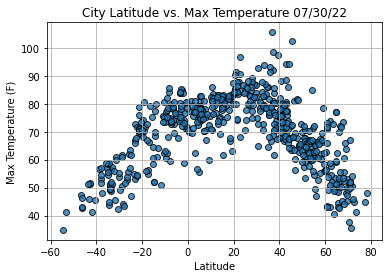

In [22]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

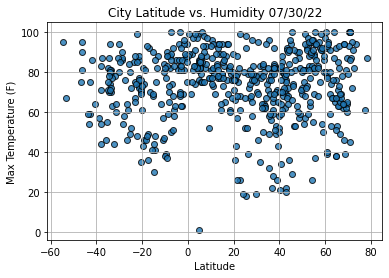

In [23]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

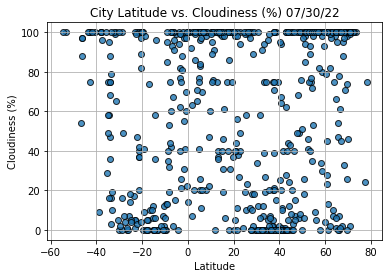

In [24]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()